# Importing Libraries

In [107]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Preprocessing

### Training Image Preprocessing

In [110]:
training_set = tf.keras.utils.image_dataset_from_directory(
    r"F:\SIH-2024\train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 1721 files belonging to 3 classes.


### Validation Image Preprocessing

In [112]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r"F:\SIH-2024\valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 1842 files belonging to 3 classes.


### To avoid Overshooting

In [114]:
# 1. Choose small learning rate default 0.001 we are taking 0.0001
# 2. There may be chance of Underfitting , so increase number of neuron
# 3. Add more Convolution laye to extract more feature from images there may bepossibility that model unable to capture 
#    relavent feature or model is confusing due to lack of feature so

## Building Model

In [116]:
from tensorflow.keras.layers import Dense,Conv2D , MaxPool2D , Flatten , Dropout
from tensorflow.keras.models import Sequential

In [117]:
model = Sequential()

In [118]:
## Building Convolution Layer

In [119]:
model.add(Conv2D(filters = 32 , kernel_size = 3 , padding = 'same' , activation = 'relu' , input_shape=[128 ,128 , 3]))
model.add(Conv2D(filters = 32 , kernel_size = 3 , activation = 'relu'))
model.add(MaxPool2D(pool_size = 2 , strides = 2))

In [120]:
model.add(Conv2D(filters = 64 , kernel_size = 3 , padding = 'same' , activation = 'relu'))
model.add(Conv2D(filters = 64 , kernel_size = 3 , activation = 'relu'))
model.add(MaxPool2D(pool_size = 2 , strides = 2))

In [121]:
model.add(Conv2D(filters = 128 , kernel_size = 3 , padding = 'same' , activation = 'relu'))
model.add(Conv2D(filters = 128 , kernel_size = 3 , activation = 'relu'))
model.add(MaxPool2D(pool_size = 2 , strides = 2))

In [122]:
model.add(Conv2D(filters = 256 , kernel_size = 3 , padding = 'same' , activation = 'relu'))
model.add(Conv2D(filters = 256 , kernel_size = 3 , activation = 'relu'))
model.add(MaxPool2D(pool_size = 2 , strides = 2))

In [123]:
model.add(Conv2D(filters = 512 , kernel_size = 3 , padding = 'same' , activation = 'relu' ))
model.add(Conv2D(filters = 512 , kernel_size = 3 , activation = 'relu'))
model.add(MaxPool2D(pool_size = 2 , strides = 2))

In [124]:
model.add(Dropout(0.25)) # to avoid overfitting

In [125]:
model.add(Flatten())

In [126]:
model.add(Dense(units=1500 , activation = 'relu'))

In [127]:
model.add(Dropout(0.4))

In [128]:
model.add(Dense(3, activation='softmax')) 

## Compiling Model

In [130]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [131]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [133]:
training_history = model.fit(x = training_set , validation_data = validation_set , epochs = 10)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.5524 - loss: 0.9998 - val_accuracy: 0.6363 - val_loss: 0.8249
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.7316 - loss: 0.6326 - val_accuracy: 0.7899 - val_loss: 0.5992
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.8168 - loss: 0.4355 - val_accuracy: 0.8024 - val_loss: 0.6478
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.7750 - loss: 0.5599 - val_accuracy: 0.7856 - val_loss: 0.5135
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 185s 3s/step - accuracy: 0.8895 - loss: 0.2853 - val_accuracy: 0.8833 - val_loss: 0.3675
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 188s 3s/step - accuracy: 0.9254 - loss: 0.1894 - val_accuracy: 0.7150 - val_loss: 0.8281
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 186s 3s/step - accuracy: 0.8493 - loss: 0.3325 - val_accuracy: 0.8979 - val_loss: 0.4148
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 187s 3s/step - accuracy: 0.9525 - loss: 0.1328 - val_accuracy: 0.8860 - v

# Model Evalution

In [135]:
#model Evaluation on Training set
train_loss , train_acc = model.evaluate(training_set)

54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 592ms/step - accuracy: 0.9860 - loss: 0.0492


In [136]:
print(train_loss , train_acc)

0.04736105725169182 0.9837303757667542


In [137]:
#model on Validation set
valid_loss , valid_acc = model.evaluate(validation_set)

58/58 ━━━━━━━━━━━━━━━━━━━━ 34s 586ms/step - accuracy: 0.9163 - loss: 0.4302


In [138]:
print(valid_loss , valid_acc)

0.42237725853919983 0.920195460319519


# Saving Model

In [140]:
model.save("trained_model.keras")

In [141]:
training_history.history

{'accuracy': [0.6101104021072388,
  0.7652527689933777,
  0.8320744037628174,
  0.7977919578552246,
  0.9041255116462708,
  0.9169088006019592,
  0.8907611966133118,
  0.9529343247413635,
  0.9558396339416504,
  0.973271369934082],
 'loss': [0.8491673469543457,
  0.5581885576248169,
  0.40021073818206787,
  0.4933069050312042,
  0.23941868543624878,
  0.21653228998184204,
  0.24786657094955444,
  0.13010530173778534,
  0.12959297001361847,
  0.08270423859357834],
 'val_accuracy': [0.6362649202346802,
  0.7899022698402405,
  0.8023887276649475,
  0.7855591773986816,
  0.883279025554657,
  0.7149837017059326,
  0.897936999797821,
  0.885993480682373,
  0.9028230309486389,
  0.920195460319519],
 'val_loss': [0.8249059915542603,
  0.5991595983505249,
  0.6478474140167236,
  0.5134801268577576,
  0.3675173819065094,
  0.8281332850456238,
  0.4147878587245941,
  0.5059056878089905,
  0.4498719573020935,
  0.42237725853919983]}

## Accuracy Visualization

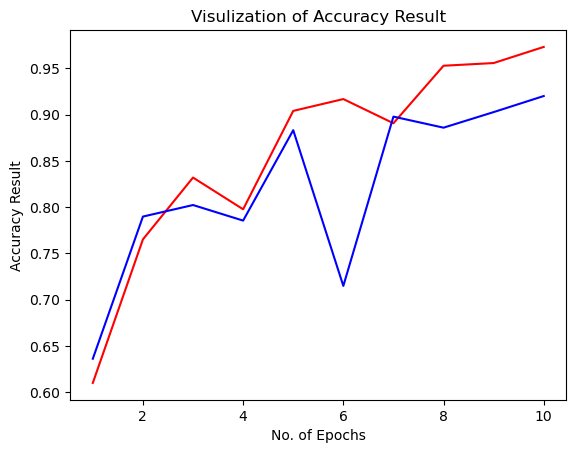

In [143]:
epochs = [i for i in range(1 , 11)]
plt.plot(epochs , training_history.history['accuracy'] , color = 'red' , label = 'Training Accuracy')
plt.plot(epochs , training_history.history['val_accuracy'] , color = 'blue' , label = 'Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visulization of Accuracy Result")
plt.show()

## Some Other Metrics For Model Evaluation

In [145]:
class_name = validation_set.class_names
class_name

['valid_early', 'valid_healthy', 'valid_late']

In [146]:
test_set = tf.keras.utils.image_dataset_from_directory(
    r'Tomato_Dataset\Plant_Diseases\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

NotFoundError: Could not find directory Tomato_Dataset\Plant_Diseases\valid

In [ ]:
y_pred = model.predict(test_set)
y_pred , y_pred.shape

In [ ]:
predicted_categories = tf.argmax(y_pred , axis = 1)
predicted_categories

In [ ]:
true_categories = tf.concat([y for x , y in test_set] ,axis = 0)
true_categories

In [ ]:
Y_true = tf.argmax(true_categories , axis = 1)
Y_true

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Y_true , predicted_categories , target_names = class_name))

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true , predicted_categories)
cm

In [ ]:
cm.shape

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Class", fontsize=20)
plt.ylabel("Actual Class", fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize=20)
plt.show()

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Create a ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_name)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(30, 15))
disp.plot(ax=ax)

# Rotate x-axis labels
plt.xticks(rotation=60)  # Set the angle for the x-axis labels

# Show the plot
plt.show()

# Visualization Single Image of Test set

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_path = r"Tomato_Dataset\Plant_Diseases\valid\Tomato___healthy\ed6f80a2-c69f-4d33-ad3d-ef2186aa1db1___RS_HL 9669.jpg"

img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()


### Testing Model

In [ ]:
import numpy as np

# Load and preprocess the image
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])

print(input_arr.shape)


In [ ]:
prediction = model.predict(input_arr)
prediction,prediction.shape

In [ ]:
result_index = np.argmax(prediction)
result_index

In [ ]:
# Assuming class_name is a list of class labels
model_prediction = class_name[result_index]  # Use indexing instead of calling as a function

# Displaying the result
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")  # Use f-string for better formatting
plt.xticks([])
plt.yticks([])
plt.show()
